In [1]:
from tools.Models import TwoLink
from math import pi
import spatialgeometry as sg

robot = TwoLink()
# robot.q = [pi/4, 0]
fr = robot.fkine(robot.q)
print(fr)
J = robot.jacob0(robot.q)
print(J)

axes = sg.Axes(0.5)
print(axes)

   1         0         0         2         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         

[[0. 0.]
 [2. 1.]]
stype: axes 
 pose: [0. 0. 0.]


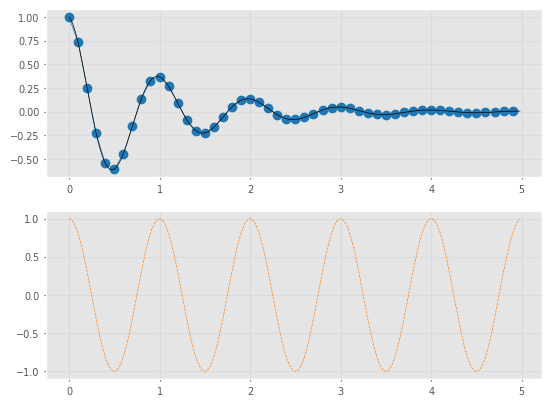

In [14]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)


fig,axs = plt.subplots(2,1)
axs[0].plot(t1, f(t1), color='tab:blue', marker='o')
axs[0].plot(t2, f(t2), color='black')
axs[1].plot(t2, np.cos(2*np.pi*t2), color='tab:orange', linestyle='--')

In [5]:
from tools.Models import TwoLink
robot = TwoLink()
currentPose = robot.fkine(robot.q)
print(currentPose)
currentPose.t[0:2]

   1         0         0         2         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         



array([2., 0.])

In [26]:
import numpy as np
t = []
t.append([0,1])
t.append([2,3])
print(t)
t = np.array(t)
t[:,0]

[[0, 1], [2, 3]]


array([0, 2])

In [32]:

import numpy as np
l = [[2,3],[3,4],[4,5]]

np.array(l)














array([[2, 3],
       [3, 4],
       [4, 5]])

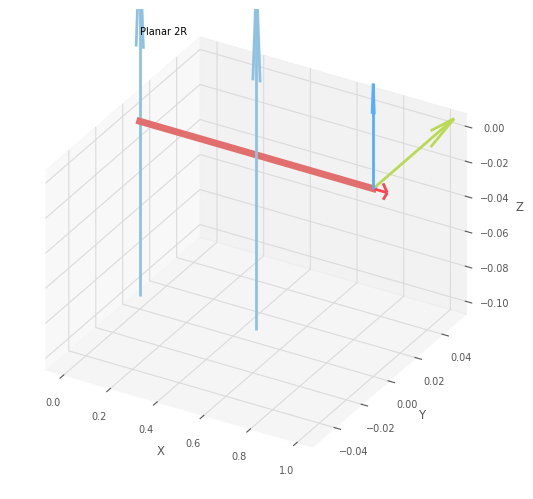

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [38]:
import numpy as np
from tools.Models import TwoLink, UncertantTwoLink
from tools.Control import Control
from roboticstoolbox.backends.PyPlot import PyPlot
from math import pi
from roboticstoolbox.tools.trajectory import *
from tools.Utils import *
from control.trajectory_control import *

brobot = UncertantTwoLink()
robot = TwoLink()
env = PyPlot()
goal = [pi/8,0]

T = 2
traj_fun = [quintic_func(robot.q[i], goal[i],T) for i in range(robot.n)]

traj = ClippedTrajectory(traj_fun, T)
loop = FBL(robot, env, [0,-9.81,0])

loop.setR(reference = traj, goal = goal, threshold = 0.1)
loop.setK(kp = [16,8], kd = [4,2])

q_d, qd_d, qdd_d = loop.reference(2, 1)